In [4]:
import pandas as pd
import numpy as np
import xgboost    
from xgboost import XGBRegressor
from sklearn.datasets import load_boston 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [5]:
boston = load_boston()
x,y = boston.data,boston.target
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.15)

In [6]:
xgbr =XGBRegressor(verbosity=0)
print(xgbr)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=0)


In [8]:
xgbr.fit(xtrain,ytrain)
score=xgbr.score(xtrain,ytrain)
print("Training score:",score)

Training score: 0.9999931153817887


In [9]:
cv_score = cross_val_score(xgbr,xtrain,ytrain,cv=10)
print("CV mean score:",cv_score.mean())

CV mean score: 0.8755851944458506


In [10]:
ypred = xgbr.predict(xtest)
mse = mean_squared_error(ytest,ypred)
print("MSE: ",mse)
print("RMSE:",mse*(1/2.0))

MSE:  9.567281581430986
RMSE: 4.783640790715493


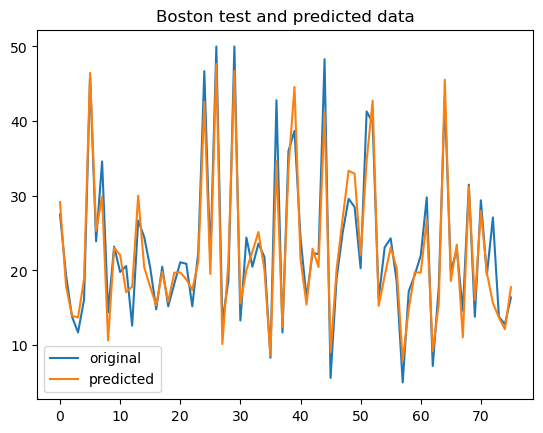

In [11]:
x_ax = range(len(ytest))
plt.plot(x_ax,ytest,label="original")
plt.plot(x_ax,ypred,label="predicted")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()